In [56]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np
import pickle
import seaborn as sns

In [79]:
# Function to get the moving average
def window_moving_average(window, data):
    total = len(data)
    moving_averages = [0]*(window//2)
    for block in tqdm(range(window, total)):
        close = data[block-window : block+window]['Close']
        ma = close.mean()
        moving_averages.append(ma)
    return moving_averages

def get_moving_average(data, *args):
    moving_averages = {}
    
    for window in args:
        moving_averages[window] = window_moving_average(window, data)
    
    return moving_averages

    
# Function to get the crossovers of the Moving Averages
def get_moving_averages_crossovers(moving_averages, prev_health = False):
    crossovers         = {}
    crossovered_at     = []
    change             = False
    
    for i in range(1, len(moving_averages[WINDOW1])):
        long  = moving_averages[WINDOW1]
        short = moving_averages[WINDOW2]

        if long[i] != 0:

            if long[i] - short[i] > 0:
                health = True
            elif long[i] - short[i] < 0:
                health = False

            if health != prev_health:
                change = True
            else:
                change=False

            prev_health = health

            if change:
                crossovers[long[i]] = health
#                 crossovers.append(long[i]) 
                crossovered_at.append(i)
        
    return crossovers, crossovered_at

In [48]:
NAME = 'XRPBTC'
data = pd.read_csv('Binance_XRPBTC_1h.csv')
data.head()

,Date,Symbol,Open,High,Low,Close,Volume XRP,Volume BTC
0,2019-12-11 02-AM,XRPBTC,0.000031,0.000031,0.000031,0.000031,73311,2.245
1,2019-12-11 01-AM,XRPBTC,0.000031,0.000031,0.000031,0.000031,942496,28.910
2,2019-12-11 12-AM,XRPBTC,0.000031,0.000031,0.000031,0.000031,1787941,55.080
3,2019-12-10 11-PM,XRPBTC,0.000031,0.000031,0.000031,0.000031,1438579,44.270
4,2019-12-10 10-PM,XRPBTC,0.000031,0.000031,0.000031,0.000031,1303223,39.970


In [47]:
WINDOW1 = 200
WINDOW2 = 50

# Loading a Saved Moving Averages File
# with open(f'ma-{WINDOW1}-{WINDOW2}_{NAME}', 'rb') as f:
#     moving_averages = pickle.load(f)

moving_averages = get_moving_average(data, WINDOW1, WINDOW2)

with open(f'ma-{WINDOW1}-{WINDOW2}_{NAME}', 'wb') as f:
    pickle.dump(moving_averages, f, protocol=pickle.HIGHEST_PROTOCOL)


100%|██████████████████████████████████████████████████████████████████████████| 18406/18406 [00:05<00:00, 3227.55it/s]


In [80]:
crossovers, crossovered_at = get_moving_averages_crossovers(moving_averages)

print(f'Flipped {len(crossovers)} times!')

Flipped 69 times!


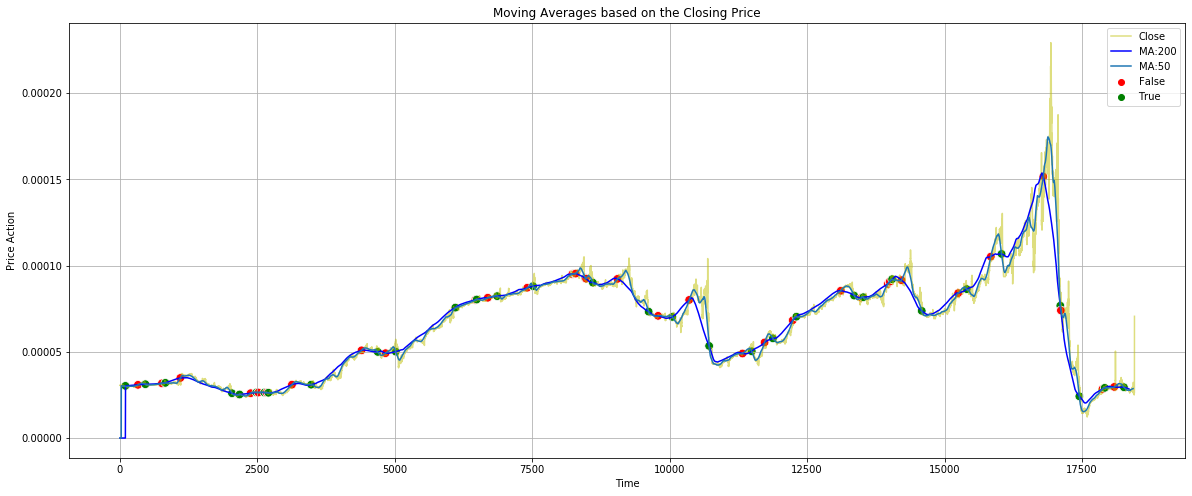

In [100]:
plt.figure(figsize=(20, 8))

plt.plot(data['Close'], label='Close', color='y', alpha=0.5)
plt.plot(moving_averages[WINDOW1], label=f'MA:{WINDOW1}', color='b')
plt.plot(moving_averages[WINDOW2], label=f'MA:{WINDOW2}')
sns.scatterplot(crossovered_at, list(crossovers.keys()), hue=list(crossovers.values()), palette=['red', 'green'], s=75)

plt.xlabel('Time')
plt.ylabel('Price Action')
plt.title('Moving Averages based on the Closing Price')

plt.legend()
plt.grid(1)
plt.show()

In [ ]:
def profit_loss():
    